In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM, z_at_value 
import astropy.units as u

data = pd.read_csv('../DATA/ZFOURGE/CDFS/CDFS_MAIN.csv')
df = pd.DataFrame(data)
df = df[df['Use'] == 1] # 13,299
df = df[df['FKs'] > 0] # 12,676
df = df[df['F3.6'] > 0] # 12,620
df = df[df['F4.5'] > 0] # 12,594
df = df[df['F5.8'] > 0] # 10,052
df = df[df['F8.0'] > 0] # 7824

mag_lim = 25.9 # apparent magnitude limit (same as AB magnitude limit)
redshift_bins = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6)] # redshift bins
survey_area = 0.03556 # survey area in square degrees
min_count = 10 # minimum number of galaxies in a bin
all_lum_bins = [30, 25, 25, 20, 15, 10] # number of luminosity bins in each redshift bin
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

C:\Users\n10480129\AppData\Local\Temp\ipykernel_12728\2649150712.py:20: RuntimeWarning: invalid value encountered in log10
  mag_ab = 25 - 2.5*np.log10(flux) # apparent magnitude -> AB magnitude


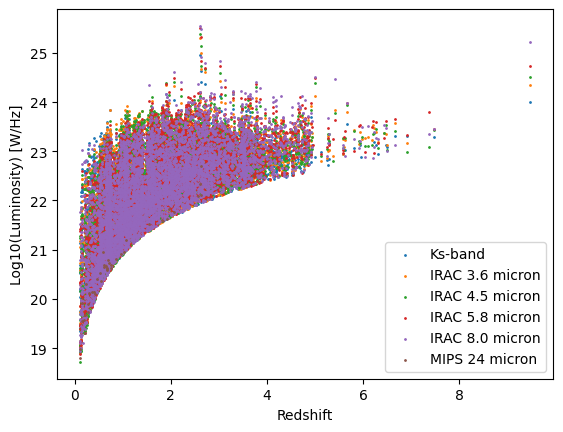

In [6]:
z = df['zpk'].values # redshift
d = cosmo.luminosity_distance(z).to(u.m).value # meters

fks = df['FKs'].values # Ks-band flux
f36 = df['F3.6'].values # IRAC 3.6 micron flux
f45 = df['F4.5'].values # IRAC 4.5 micron flux
f58 = df['F5.8'].values # IRAC 5.8 micron flux
f80 = df['F8.0'].values # IRAC 8.0 micron flux
f24 = df['F24'].values # MIPS 24 micron flux

fluxes = [fks, f36, f45, f58, f80, f24]
labels = ['Ks-band', 'IRAC 3.6 micron', 'IRAC 4.5 micron', 'IRAC 5.8 micron', 'IRAC 8.0 micron', 'MIPS 24 micron']

# fluxes = [f24]
# labels = ['MIPS 24 micron']

plt.xlabel('Redshift')
plt.ylabel('Log10(Luminosity) [W/Hz]')
for flux, label in zip(fluxes, labels):
    mag_ab = 25 - 2.5*np.log10(flux) # apparent magnitude -> AB magnitude
    mask = (mag_ab <= mag_lim)
    f = 0.3631 * flux * 10**-32  # uJy -> W/m^2/Hz
    flux_lum = 4 * np.pi * (d**2) * f # m^2 * W/m^2/Hz = W/Hz
    plt.scatter(z[mask], np.log10(flux_lum[mask]), s=1, label=label)
plt.legend()
plt.show()